In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_pickle('C:\\Users\\alessandra.flaccaven\\saved_files\\cleaned_df.pkl')

In [3]:
df.head()

,link,published,title,text,author,label,clean_title,clean_text
0,https://www.nytimes.com/2020/02/11/business/ch...,2020-02-11T23:39:27,"As Coronavirus Stifles China, Economic Logjams...","In Australia, after hauling hundreds of thousa...",[Matt Phillips],0,coronavirus stifles china economic logjams bui...,australia hauling hundreds thousands tons iron...
1,https://www.nytimes.com/2020/02/12/business/de...,2020-02-12T12:22:02,SoftBank Takes Another Multibillion-Dollar Hit...,TOKYO — SoftBank Group has taken another multi...,[Ben Dooley],0,softbank takes another muibillion dollar hit b...,tokyo softbank group taken another muibillion ...
2,https://www.nytimes.com/2020/02/12/technology/...,2020-02-12T11:20:39,Britain to Create Regulator for Internet Content,LONDON — Britain on Wednesday introduced a pla...,[Adam Satariano],0,britain create regulator internet content,london britain wednesday introduced plan would...
3,https://www.nytimes.com/2020/02/11/business/me...,2020-02-11T21:42:23,T-Mobile and Sprint Are Cleared to Merge as th...,"“Today was a huge victory for this merger,” Jo...",[Edmund Lee],0,t mobile sprint cleared merge big get bigger,"""today huge victory merger"" john legere chief ..."
4,https://www.nytimes.com/2020/02/11/business/co...,2020-02-11T23:33:57,Coronavirus Shock Could Push Europe Into a Dow...,"FRANKFURT — So far, only scattered cases of th...",[Jack Ewing],0,coronavirus shock could push europe downturn,frankfurt far scattered cases coronavirus appe...


In [71]:
# Preparing the target and predictors for modeling
# Keep the title and body text separated for different models

X_body_text = df['clean_text'].values
X_title_text = df['clean_title'].values
y = df['label'].values

In [72]:
#Convert the text into a TF-IDF.

#TF-IDF counts the number of occurrences of each word in a document and divides the number of occurrences of each word in a document by the total number of words in the document: these new features are called TF for Term Frequencies.
#Another refinement on top of TF is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

#This downscaling is called TF-IDF for “Term Frequency times Inverse Document Frequency”.

tfidf = TfidfVectorizer(ngram_range=(1,2), max_df= 0.85, min_df= 0.01)

In [73]:
X_body_tfidf = tfidf.fit_transform(X_body_text)
X_title_tfidf = tfidf.fit_transform (X_title_text)

In [74]:
indices = df.index.values

In [87]:
X_body_tfidf_train, X_body_tfidf_test, \
y_body_train, y_body_test, \
indices_body_train, indices_body_test = train_test_split(X_body_tfidf, y, indices, test_size = 0.4, random_state=42)

In [88]:
df.loc[indices_body_train].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,269,269,269,269,269,269,269
1,10,10,10,10,10,10,10


In [89]:
df.loc[indices_body_test].groupby('label').agg('count')

,link,published,title,text,author,clean_title,clean_text
label,,,,,,,
0,177,177,177,177,177,177,177
1,10,10,10,10,10,10,10


In [90]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
nb_body = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [92]:
nb_body.fit(X_body_tfidf_train, y_body_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False)

In [93]:
y_body_train_pred = nb_body.predict(X_body_tfidf_train)

In [95]:
print('Naive Bayes In Sample F1 and Accuracy Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_train, y_body_train_pred, average='weighted')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_train, y_body_train_pred)*100))
print('Precision score {:.4}%'.format(precision_score(y_body_train, y_body_train_pred, average='weighted')*100))
print('Recall score {:.4}%'.format(recall_score(y_body_train, y_body_train_pred, average='weighted')*100))

Naive Bayes In Sample F1 and Accuracy Scores:
F1 score 97.92%
Accuracy score 98.21%
Precision score 98.24%
Recall score 98.21%


In [96]:
np.where(y_body_train != y_body_train_pred)

(array([ 25,  90, 192, 209, 233], dtype=int32),)

In [18]:
#These are misclassified articles in the In-Sample group. They were Ham misclassified as Spam.

df.loc[[25,  63,  90, 132, 192, 209, 230, 233, 241, 270]]

,link,published,title,text,author,label,clean_title,clean_text
25,https://www.nytimes.com/2020/02/11/business/da...,2020-02-11T10:00:25,"Daimler, Stretched by Diesel Fines and Technol...",FRANKFURT — The German carmaker Daimler slippe...,[Jack Ewing],0,daimler stretched diesel fines technology shif...,frankfurt german carmaker daimler slipped red ...
63,https://www.nytimes.com/2020/02/11/climate/car...,2020-02-11T18:43:23,A Rare Trump-Era Climate Policy Hits an Obstac...,"In Texas, Occidental Petroleum is looking to c...",[Brad Plumer],0,rare trump era climate policy hits obstacle ta...,texas occidental petroleum looking capture car...
90,https://www.nytimes.com/2020/02/06/health/coro...,2020-02-07T18:27:27,China Begins Testing an Antiviral Drug in Coro...,China is forging ahead in the search for treat...,[Denise Grady],0,china begins testing antiviral drug coronaviru...,china forging ahead search treat the momentent...
132,http://feeds.marketwatch.com/~r/marketwatch/ne...,2013-02-05T13:01:27,How to pick dividend-paying stocks,"CHAPEL HILL, N.C. (MarketWatch) — So you’ve fi...",[Mark Hulbert],0,pick dividend paying stocks,chapel hill nc marketwatch youve finally decid...
192,https://www.cnbc.com/2020/02/06/tesla-becomes-...,2020-02-06T19:23:31,Tesla passes Apple as No. 1 holding on SoFi as...,Young retail investors rushed into Tesla stock...,[Kate Rooney],0,tesla passes apple no holding sofi young inves...,young retail investors rushed tesla stock surg...
209,https://www.theguardian.com/politics/live/2020...,2020-02-12T12:32:54,Boris Johnson faces Jeremy Corbyn's questions ...,What term do you want to search? Search with g...,[Andrew Sparrow],0,boris johnson faces jeremy corbyn's questions ...,term want search? search google
230,https://www.theguardian.com/commentisfree/2020...,2020-02-12T06:30:25,These three post-Brexit bills bulldoze a hole ...,"Hedgehogs, yellowhammers and dormice did not f...",[Fiona Harvey],0,three post brexit bills bulldoze hole environm...,hedgehogs yellowhammers dormice figure highly ...
233,https://www.theguardian.com/business/2020/feb/...,2020-02-12T06:00:25,Trump's 'America first' policy offers Beijing ...,Donald Trump’s “America first” policies are wi...,[Barry Eichengreen],0,trump's 'america first' policy offers beijing ...,"donald trumps ""america first"" policies widely ..."
241,https://www.theguardian.com/sport/2020/feb/11/...,2020-02-11T18:04:37,UK Sport launches review into ailing UK Athlet...,• Review aims to make athletics governing body...,[Sean Ingle],0,uk sport launches review ailing uk athletics a...,review aims make athletics governing body fit ...
270,http://feeds.foxnews.com/~r/foxnews/opinion/~3...,2020-02-12T00:01:32,Gutfeld on American optimism vs. media despair,How bad do Americans feel about life in Americ...,"[Greg Gutfeld, Greg Gutfeld Currently Serves A...",0,gutfeld american optimism vs media despair,bad americans feel life america? listened medi...


In [23]:
import pickle

with open(r"C:\\Users\\alessandra.flaccaven\\saved_files\\dirty_df.pkl", "rb") as dirty_pickle:
    dirty_df = pickle.load(dirty_pickle)

In [24]:
for article in dirty_df.loc[[5,  14,  90, 118, 156, 183, 225, 285, 302, 323, 326, 334, 363], 'text']:
    print(article)
    print('--------------\n\n\n\n')

How did you move through up the ranks?

I got to work on the projects that in many respects were the company betting against itself. I ended up always finding myself in a leadership role on all those projects, the very important backup plans. If people were just looking to manage their career, they would avoid those things. But for me, I found them to be a real opportunity.

In some cases, I had a difficult time convincing some engineers to join the projects because they were like, “Our company doesn’t think that’s the No. 1 project.” And I said, “Yeah, but it will be in like five years.”

Is the situation with Apple destined to repeat itself again in a few years?

I don’t think so. It was a commercial dispute. There was a lot of money at stake. But these two companies know how to do this, and it ultimately played out on the courthouse steps. My guess is that two companies will probably resolve stuff next time. I do not think it was good for either company, really.

And as you were dea

In [97]:
#Out of sample predictions and metrics

y_body_pred = nb_body.predict(X_body_tfidf_test)

In [99]:
# print metrics
print('Naive Bayes F1 and Accuracy Scores:')
print('F1 score {:.4}%'.format(f1_score(y_body_test, y_body_pred, average='weighted')*100 ))
print ('Accuracy score {:.4}%'.format(accuracy_score(y_body_test, y_body_pred)*100))
print('Precision score {:.4}%'.format(precision_score(y_body_test, y_body_pred, average='weighted')*100))
print('Recall score {:.4}%'.format(recall_score(y_body_test, y_body_pred, average='weighted')*100))

Naive Bayes F1 and Accuracy Scores:
F1 score 96.9%
Accuracy score 97.33%
Precision score 97.4%
Recall score 97.33%


In [100]:
np.where(y_body_test != y_body_pred)

(array([ 50,  79,  80, 108, 184], dtype=int32),)

In [23]:
#This is the misclassified article in the Out-of-sample group. It was Ham misclassified as Spam.

df.loc[[3, 47, 50, 62, 79, 80, 88, 99, 108,184]]

,link,published,title,text,author,label,clean_title,clean_text
3,https://www.nytimes.com/2020/02/11/business/me...,2020-02-11T21:42:23,T-Mobile and Sprint Are Cleared to Merge as th...,"“Today was a huge victory for this merger,” Jo...",[Edmund Lee],0,t mobile sprint cleared merge big get bigger,"""today huge victory merger"" john legere chief ..."
47,https://www.nytimes.com/2020/02/09/smarter-liv...,2020-02-12T04:53:17,3 Simple Things You Can Do Today to Improve Yo...,Your paycheck should be making pit stops befor...,[Tim Herrera],0,simple things today improve finances,paycheck making pit stops hits account getting...
50,https://www.nytimes.com/2020/02/11/science/tyr...,2020-02-11T19:49:26,Canada’s Newest Tyrannosaur Is Named for a ‘Re...,Alberta is a tyrannosaur graveyard. There rest...,[Nicholas St. Fleur],0,canadas newest tyrannosaur named reaper death,alberta tyrannosaur graveyard rest great carni...
62,https://www.nytimes.com/2020/02/11/world/asia/...,2020-02-12T05:29:04,"A Store, a Chalet, an Unsealed Pipe: Coronavir...","The new coronavirus, though most serious in Ch...","[Vivian Wang, Austin Ramzy, Megan Specia]",0,store chalet unsealed pipe coronavirus hot spo...,"new coronavirus though serious china ""holds gr..."
79,https://www.nytimes.com/2020/02/08/world/asia/...,2020-02-10T17:05:13,Where’s Xi? China’s Leader Commands Coronaviru...,"“Xi’s grip on power is not light,” said Jude B...","[Chris Buckley, Steven Lee Myers]",0,wheres xi? chinas leader commands coronavirus ...,"""xis grip power light"" said jude blanchette fr..."
80,https://www.nytimes.com/2020/02/08/world/asia/...,2020-02-10T05:25:09,"Deaths in China From Coronavirus Reach 811, Su...",A report published on Friday on 138 coronaviru...,[],0,deaths china coronavirus reach 811 surpassing ...,report published friday 138 coronavirus patien...
88,https://www.nytimes.com/2020/02/07/climate/mos...,2020-02-07T17:25:43,Endless Night at -50 Degrees: A Look at Life o...,"Since October, the Polarstern, a German resear...","[Henry Fountain, Esther Horvath, Photographs By]",0,endless night 50 degrees look life icebreaker,since october polarstern german research icebr...
99,https://www.nytimes.com/2020/02/11/technology/...,2020-02-12T00:18:44,"F.T.C. Broadens Review of Tech Giants, Homing ...",WASHINGTON — The Federal Trade Commission said...,"[Cecilia Kang, David Mccabe]",0,ftc broadens review tech giants homing deals,washinon federal trade commission said tuesday...
108,https://www.nytimes.com/2020/02/09/us/politics...,2020-02-10T00:53:16,"North Korea’s Internet Use Surges, Thwarting S...",WASHINGTON — North Korea has vastly expanded i...,[David E. Sanger],0,north koreas internet use surges thwarting san...,washinon north korea vastly expanded use inter...
184,https://www.cnbc.com/2020/02/10/gmos-grantham-...,2020-02-10T17:38:28,Jeremy Grantham warns eventually only the rich...,High-profile investor Jeremy Grantham warned i...,[Jesse Pound],0,jeremy grantham warns eventually rich procreat...,high profile investor jeremy grantham warned l...


In [24]:
#Spam words and wordcloud

spam = df[df['label']==1]

In [25]:
import nltk
nltk.download('punkt')

spam_words = nltk.word_tokenize(" ".join(spam['clean_text'].values.tolist()))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alessandra.flaccaven\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
spam_counter = Counter(spam_words)
print(spam_counter.most_common(50))

[('market', 367), ('report', 128), ('``', 94), ("''", 92), ('global', 84), ('pv', 56), ('box', 55), ('junction', 54), ('vaccines', 54), ('foot', 52), ('mouth', 52), ('disease', 52), ('industry', 50), ('phytosterols', 50), ('baby', 50), ('monitor', 50), ('well', 48), ('wheelchair', 47), ('stair', 47), ('climber', 47), ('analysis', 45), ('product', 44), ('key', 43), ('microtomes', 43), ('players', 42), ('sales', 42), ('based', 41), ('also', 39), ('growth', 39), ('regions', 39), ('type', 38), ('2017', 37), ('chemical', 37), ('fire', 36), ('tank', 36), ('best', 35), ('storage', 35), ('part', 34), ('sprinkler', 34), ('rodenticides', 33), ('information', 32), ('us', 32), ('the', 32), ('revenue', 32), ('heads', 32), ('ammonium', 30), ('sulphate', 30), ('share', 29), ('iran', 27), ('time', 26)]


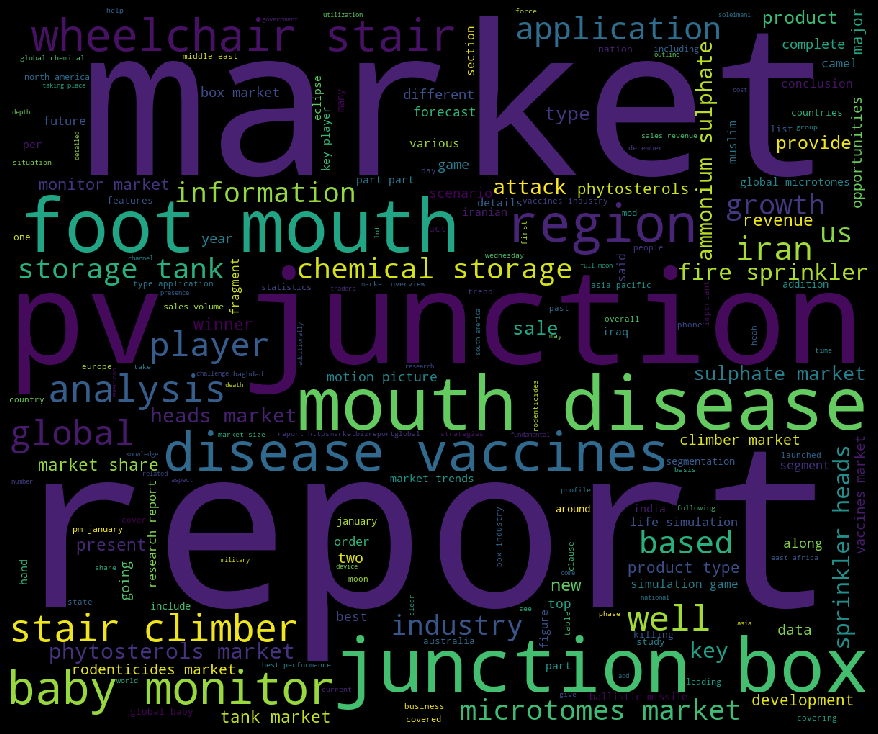

In [27]:
spam_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(spam_words))
# wordcloud2 = WordCloud(width=1200, height=1000, collocations = False).generate(" ".join(spam_words)) # to turn off bigrams

fig = plt.figure(figsize=(20,10), facecolor = 'k')
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [35]:
spam_bigrams = nltk.bigrams(spam_words)

In [36]:
spam_counter = Counter(spam_bigrams)
print(spam_counter.most_common(10))

[(('pv', 'junction'), 54), (('junction', 'box'), 54), (('foot', 'mouth'), 52), (('mouth', 'disease'), 52), (('disease', 'vaccines'), 52), (('baby', 'monitor'), 50), (('wheelchair', 'stair'), 47), (('stair', 'climber'), 47), (('chemical', 'storage'), 35), (('storage', 'tank'), 35)]


In [37]:
#Ham wordcount and wordcloud

ham = df[df['label']==0]

In [38]:
ham_words = nltk.word_tokenize(" ".join(ham['clean_text'].values.tolist()))

In [39]:
ham_counter = Counter(ham_words)
print(ham_counter.most_common(50))

[('``', 1297), ("''", 1261), ('said', 1166), ('new', 696), ("'s", 679), ('one', 628), ('people', 547), ('like', 527), ('would', 511), ('also', 497), ('could', 471), ('year', 458), ('%', 450), ('?', 449), ('us', 422), ('time', 394), ('years', 387), ('first', 339), ('get', 325), ('even', 318), ('company', 317), ('its', 307), ('two', 301), ('research', 291), ('last', 289), ('make', 278), ('many', 274), ('it', 269), ('work', 263), ('way', 263), ('may', 256), ('data', 243), ('world', 241), ('the', 241), ('climate', 234), ('companies', 224), ('heah', 222), ('trump', 221), ('much', 220), ('that', 220), ('think', 219), ('change', 218), ('percent', 217), ('well', 214), ('back', 209), ('china', 200), ('study', 200), ('day', 198), ('stock', 197), ('president', 197)]


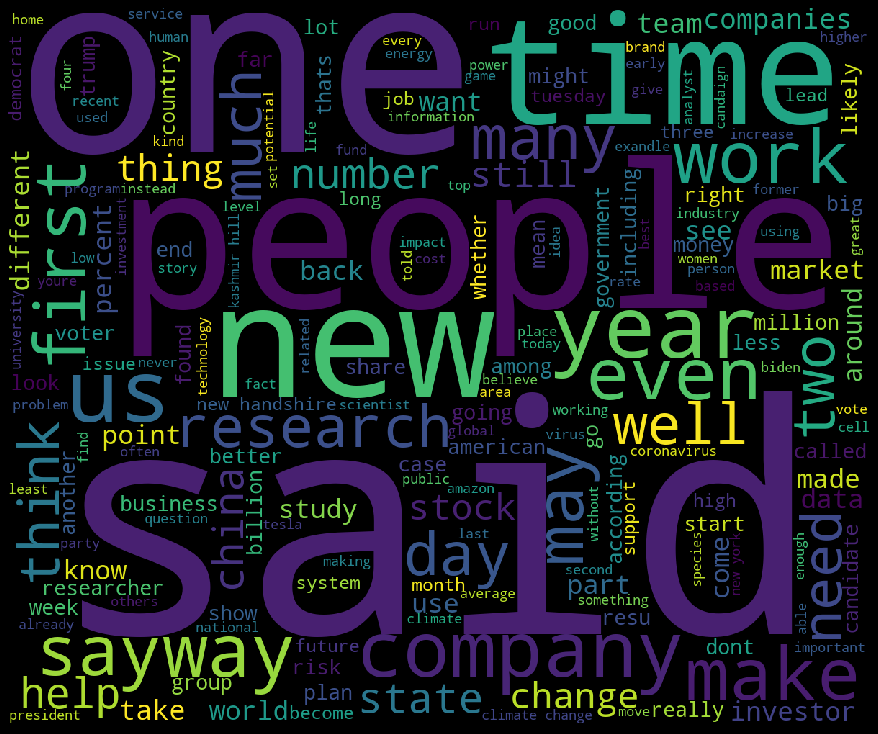

In [40]:
ham_wordcloud = WordCloud(width=1200, height=1000, random_state = 42).generate(" ".join(ham_words))

fig = plt.figure(figsize=(20,10), facecolor = 'k' )
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [41]:
ham_bigrams = nltk.bigrams(ham_words)

In [42]:
ham_counter = Counter(ham_bigrams)
print(ham_counter.most_common(10))

[(("''", 'said'), 192), (('said', '``'), 136), (('new', 'handshire'), 122), (('climate', 'change'), 115), (('``', 'the'), 97), (('kashmir', 'hill'), 95), (('new', 'york'), 94), (('``', 'i'), 75), (('last', 'year'), 72), (('``', 'we'), 65)]
